In [22]:
from sklearn import datasets, neighbors, metrics, model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

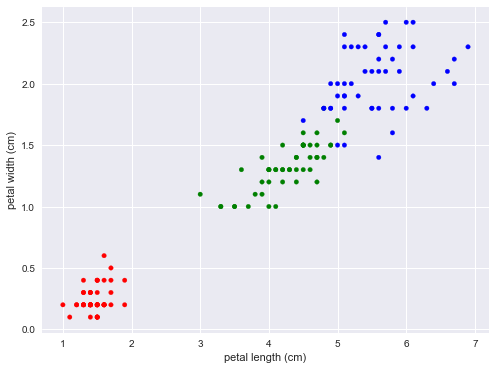

In [23]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = { 0: 'r', 1: 'g', 2: 'b' }
irisdf['ctarget'] = irisdf.target.map(cmap)
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget, figsize=(8,6))
plt.show()

In [24]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

In [26]:
predictions = irisdf.apply(my_classifier, axis=1)
irisdf['predictions'] = predictions
print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Starter Code

Work on improving the classifier below.

In [27]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)
irisdf['predictions'] = predictions
print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Using distance: KNN implementation

In [28]:
iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data, iris.target)
print knn.predict(iris.data)
print iris.target
print knn.score(iris.data, iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.966666666667


Do we see a change in performance when using the distance weight?

In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data, iris.target)
print knn.predict(iris.data)
print iris.target
print knn.score(iris.data, iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
1.0


### Solution to solving K

In [30]:
k = range(2, 100)
params = {'n_neighbors': k }

kf = model_selection.KFold(n_splits = 5, shuffle=True)
gs = model_selection.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
gs.cv_results_['mean_test_score']

array([ 0.94666667,  0.96      ,  0.96666667,  0.96666667,  0.96      ,
        0.96666667,  0.97333333,  0.96666667,  0.97333333,  0.98      ,
        0.97333333,  0.98      ,  0.98      ,  0.98      ,  0.98      ,
        0.98      ,  0.98      ,  0.97333333,  0.96666667,  0.97333333,
        0.95333333,  0.95333333,  0.95333333,  0.96      ,  0.95333333,
        0.96      ,  0.96      ,  0.96      ,  0.96      ,  0.96      ,
        0.94666667,  0.94666667,  0.94666667,  0.94666667,  0.94      ,
        0.94666667,  0.94      ,  0.93333333,  0.92666667,  0.94666667,
        0.94      ,  0.94      ,  0.94666667,  0.93333333,  0.91333333,
        0.92666667,  0.92      ,  0.92      ,  0.91333333,  0.92      ,
        0.90666667,  0.90666667,  0.89333333,  0.89333333,  0.9       ,
        0.89333333,  0.88666667,  0.88666667,  0.88666667,  0.88666667,
        0.88666667,  0.88      ,  0.88      ,  0.88      ,  0.88666667,
        0.88      ,  0.88      ,  0.88      ,  0.88666667,  0.88

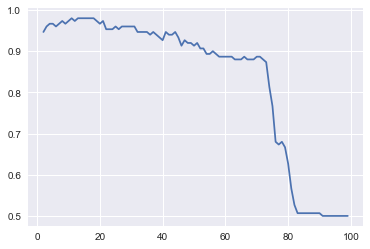

In [32]:
plt.plot(k, gs.cv_results_['mean_test_score'])

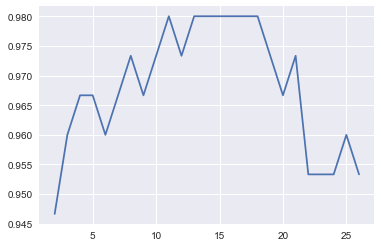

In [33]:
plt.plot(k[:25], gs.cv_results_['mean_test_score'][:25])

In [34]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

### Comparing KNN with Other Models

Advantages of KNN:

- Very easy to understand and implement
- Simple and powerful. No need for tuning complex parameters to build a model.
- No training involved (“lazy”). New training examples can be added easily. 

Disadvantages of KNN:

- Sensitive to localized data. Localized anomalies can affect outcomes significantly. 
- High computation time during testing which can be an issue for large datasets
- Normalization of data is required
- Accuracy affected by high dimensionality of data